In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
object_id = 1
datafile = "../dataset/phase_1_v3/train/"+str(object_id)+".csv"

labelfile = "../dataset/phase_1_v3/train_labels.csv"

label_df = pd.read_csv(labelfile)
train_df = pd.read_csv(datafile)
train_df["Object_id"]= object_id
label_subset = label_df[((label_df["ObjectID"]>=800)&(label_df["ObjectID"]<900))].copy().reindex()

label_subset=label_subset.sort_values(by=['ObjectID', 'TimeIndex']).reset_index(drop=True)
label_subset.to_csv("../dataset/data_subset/train_labels.csv", index=False)

In [3]:
delta_column = "Delta_SemimajorAxis"
train_df[delta_column] = train_df["Semimajor Axis (m)"].diff()
train_df[delta_column].fillna(0, inplace=True)
train_df

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\2967182994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


,Timestamp,Eccentricity,Semimajor Axis (m),Inclination (deg),RAAN (deg),Argument of Periapsis (deg),True Anomaly (deg),Latitude (deg),Longitude (deg),Altitude (m),X (m),Y (m),Z (m),Vx (m/s),Vy (m/s),Vz (m/s),Object_id,Delta_SemimajorAxis
0,2022-09-01 00:00:00.000000Z,0.000202,4.216537e+07,0.139822,94.427336,52.733092,277.810980,-0.014460,85.119506,3.578607e+07,1.783837e+07,3.820485e+07,-50599.110117,-2786.228658,1300.258746,6.534142,1,0.000000
1,2022-09-01 02:00:00.000000Z,0.000214,4.216458e+07,0.140008,94.407240,59.443909,301.205730,-0.007812,85.122842,3.578177e+07,-3.716169e+06,4.199580e+07,1168.075080,-3062.958599,-271.603808,7.513546,1,-783.717360
2,2022-09-01 04:00:00.000000Z,0.000231,4.216450e+07,0.140139,94.420500,64.355257,326.372111,0.001030,85.131695,3.577825e+07,-2.426888e+07,3.446997e+07,52684.232409,-2514.294041,-1770.701547,6.465207,1,-86.414177
3,2022-09-01 06:00:00.000000Z,0.000255,4.216524e+07,0.140147,94.419710,67.664873,353.158326,0.009633,85.144601,3.577642e+07,-3.828008e+07,1.765316e+07,90028.394917,-1287.802531,-2792.783114,3.667072,1,739.694970
4,2022-09-01 08:00:00.000000Z,0.000277,4.216620e+07,0.140112,94.348243,70.366450,20.624466,0.015595,85.158717,3.577713e+07,-4.197225e+07,-3.922585e+06,103071.600288,285.868898,-3062.068198,-0.129326,1,967.928450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,2023-02-28 14:00:00.000000Z,0.000255,4.216623e+07,0.143291,91.299968,225.026700,136.679326,-0.000556,85.168957,3.579591e+07,-2.211621e+06,4.211602e+07,3140.074700,-3069.803665,-160.665278,7.684431,1,243.093085
2168,2023-02-28 16:00:00.000000Z,0.000254,4.216606e+07,0.143863,91.366126,222.264018,169.442472,0.007405,85.153445,3.579843e+07,-2.301575e+07,3.534311e+07,55657.850999,-2575.872389,-1677.271111,6.566299,1,-172.340893
2169,2023-02-28 18:00:00.000000Z,0.000264,4.216570e+07,0.144143,91.477724,218.944319,202.715680,0.013635,85.136416,3.579782e+07,-3.762485e+07,1.905710e+07,93387.712555,-1388.630336,-2742.314036,3.670231,1,-355.833888
2170,2023-02-28 20:00:00.000000Z,0.000280,4.216549e+07,0.144184,91.525490,216.446588,235.233804,0.016332,85.122440,3.579407e+07,-4.210608e+07,-2.358435e+06,106079.765014,172.621987,-3069.271482,-0.228627,1,-211.770511


In [4]:
# label_df

In [5]:
label_subset

,ObjectID,TimeIndex,Direction,Node,Type
0,800,0,EW,SS,NK
1,800,0,NS,SS,NK
2,800,397,EW,AD,NK
3,800,403,EW,IK,EK
4,800,426,NS,IK,CK
...,...,...,...,...,...
771,899,0,NS,SS,NK
772,899,63,EW,AD,NK
773,899,120,EW,IK,CK
774,899,249,NS,IK,CK


In [10]:
def plot_field(object_id,data, node_label, plotted_field):
    print(len(node_label))
    fig = plt.figure(figsize=(25, 5))
    cm = plt.get_cmap('gist_rainbow')
    plt.plot(data.index, data[plotted_field], color = 'k', label='Training Data')
    index =0
    for index,row in node_label.iterrows():
        if row["Direction"] == 'EW':
            plt.axvline(x = row['TimeIndex'], color = cm(index/(len(node_label)-1)), linestyle = '-', linewidth=2, label='EW-'+str(row["Node"])+'-'+str(row["Type"]))
        else:
            plt.axvline(x = row['TimeIndex'], color = cm(index/(len(node_label)-1)), linestyle = '--', linewidth=2, label='NS-'+str(row["Node"])+'-'+str(row["Type"]))
    plt.title('Behavioral Nodes for Object ' + str(object_id))
    plt.xlabel('Time')
    plt.ylabel(plotted_field)
    plt.legend()
    plt.grid()
    plt.show()

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


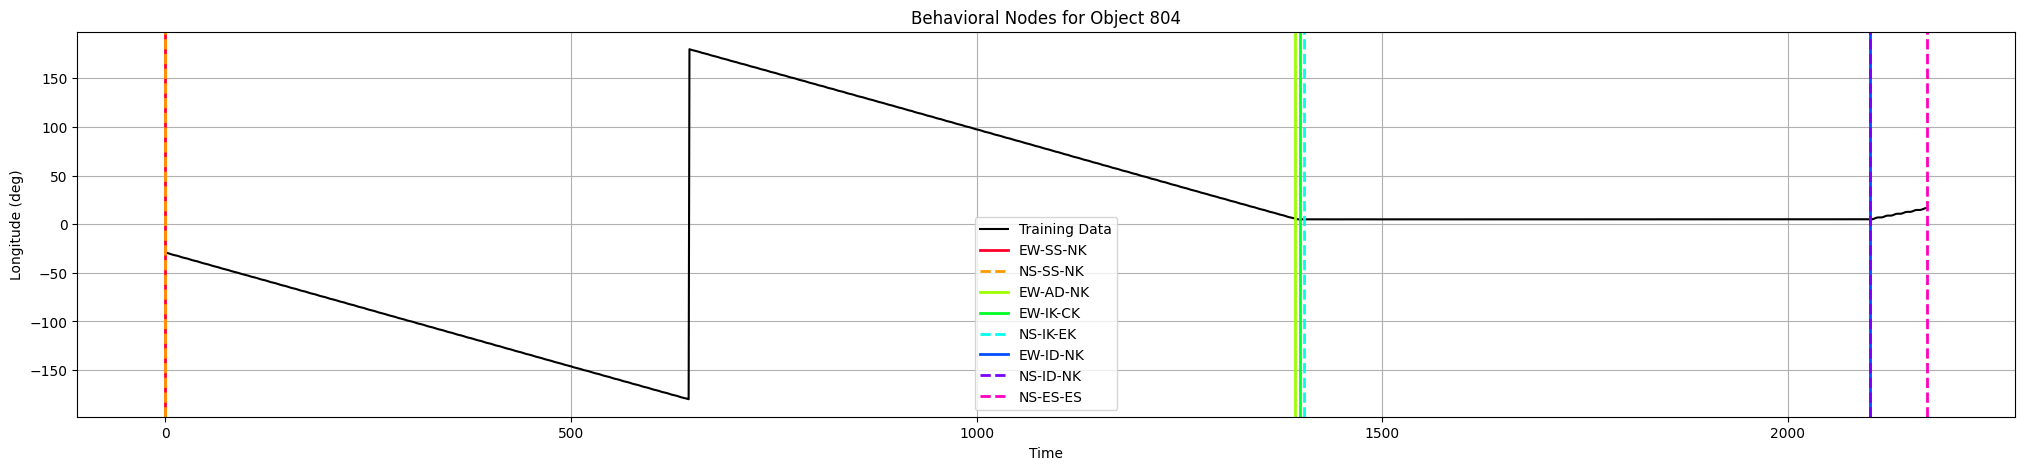

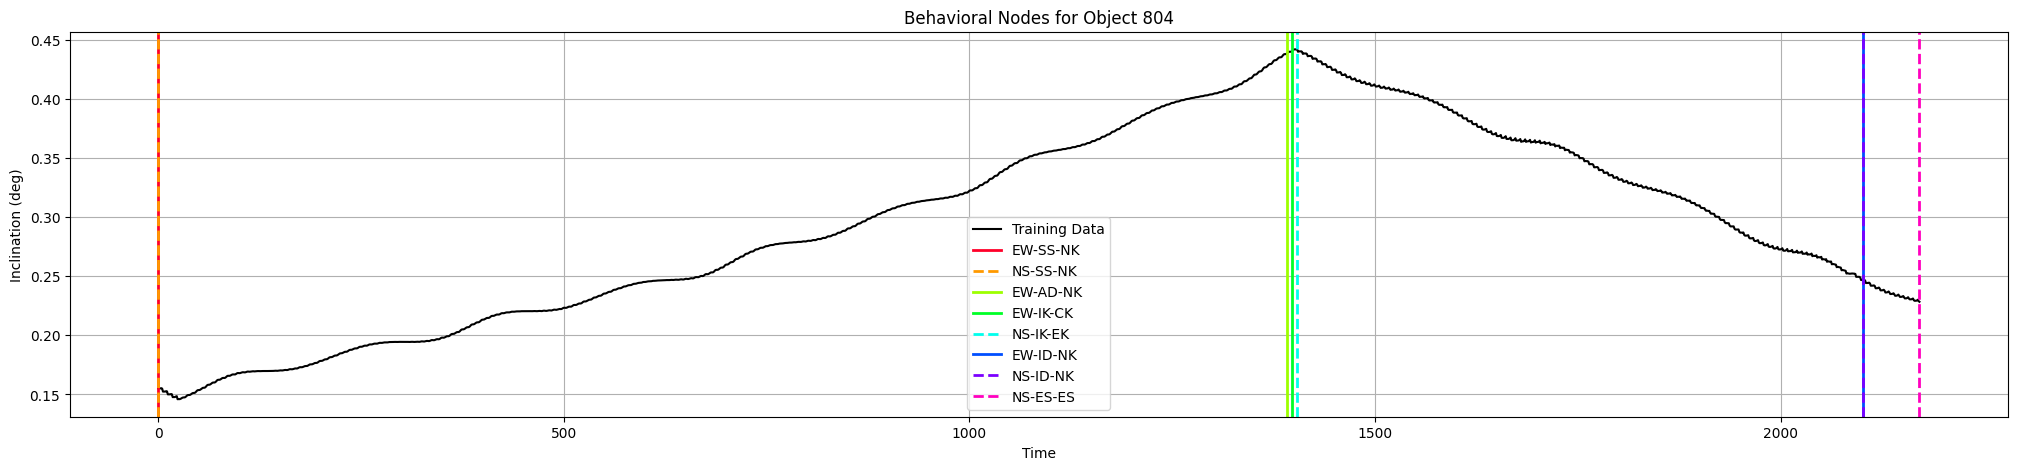

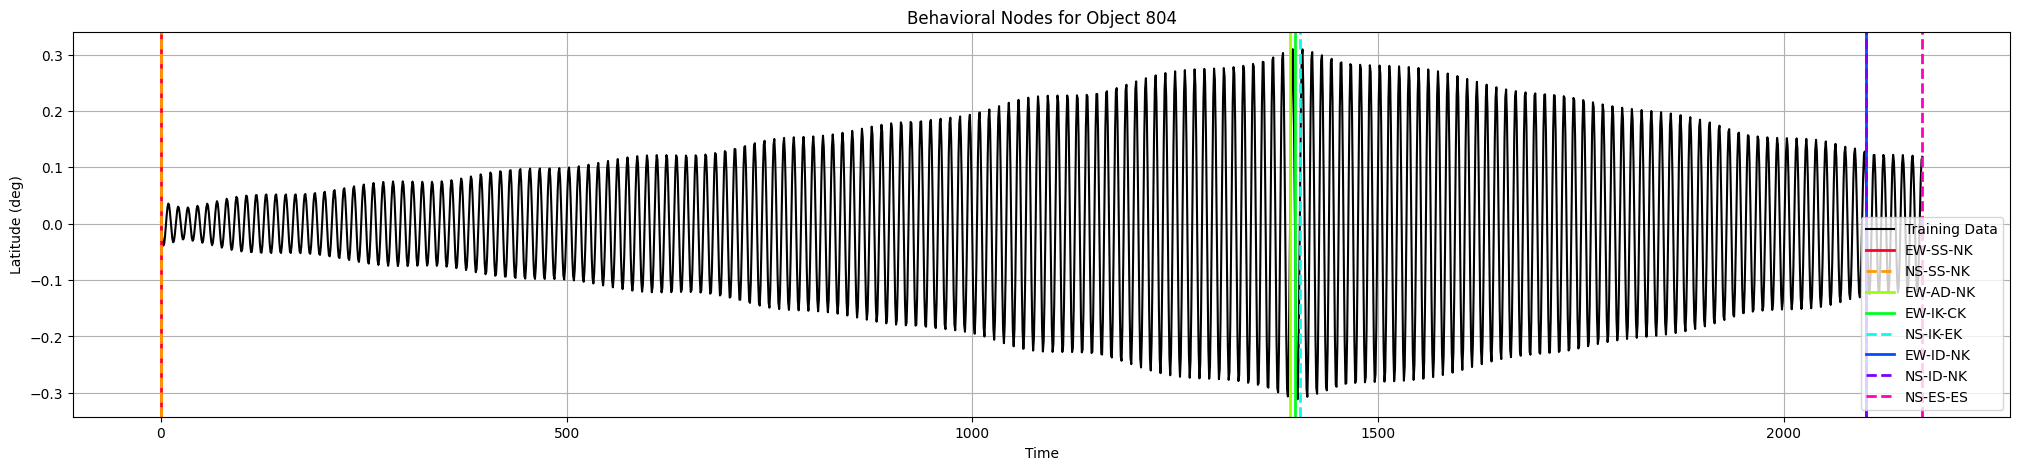

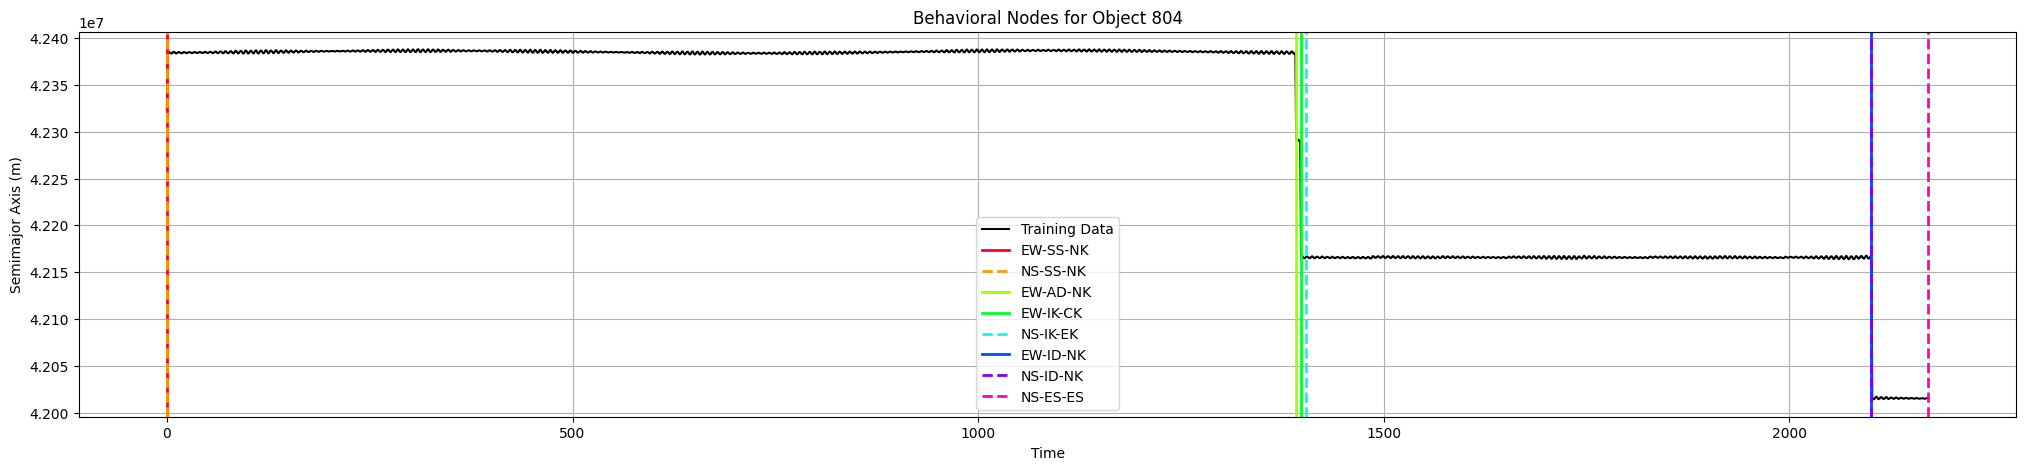

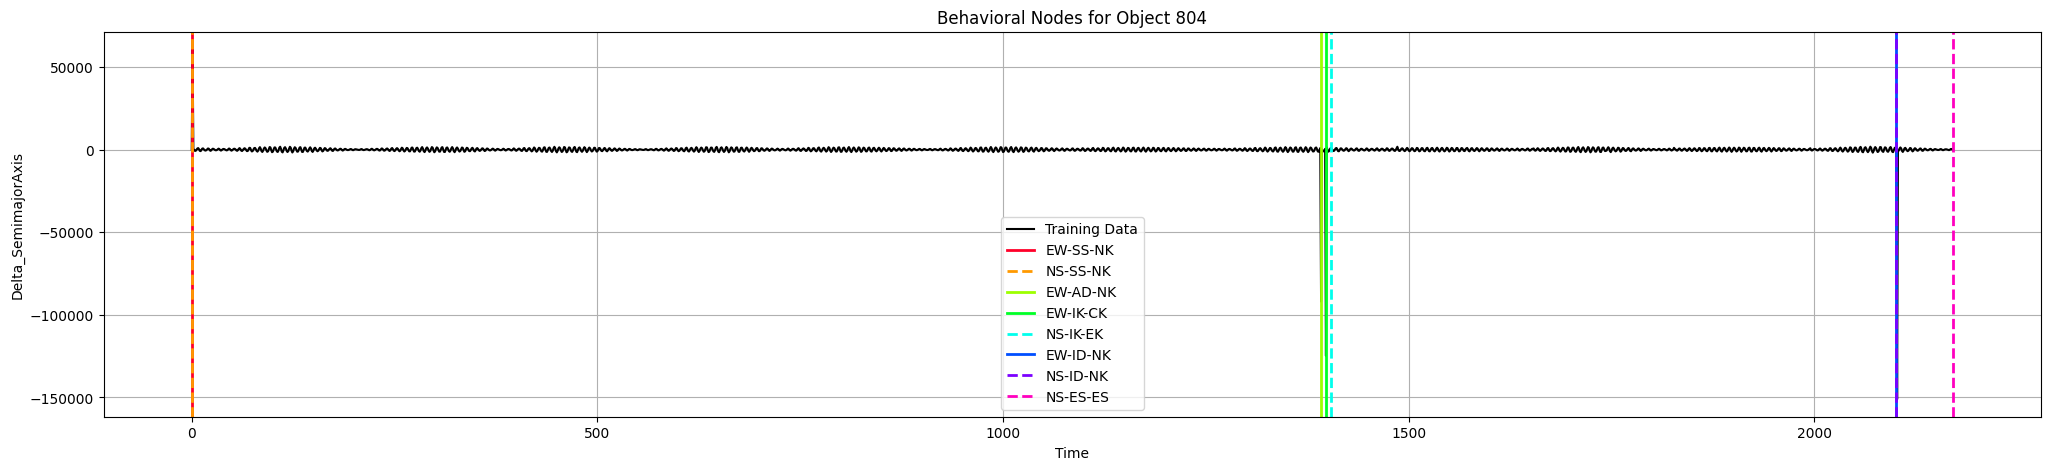

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


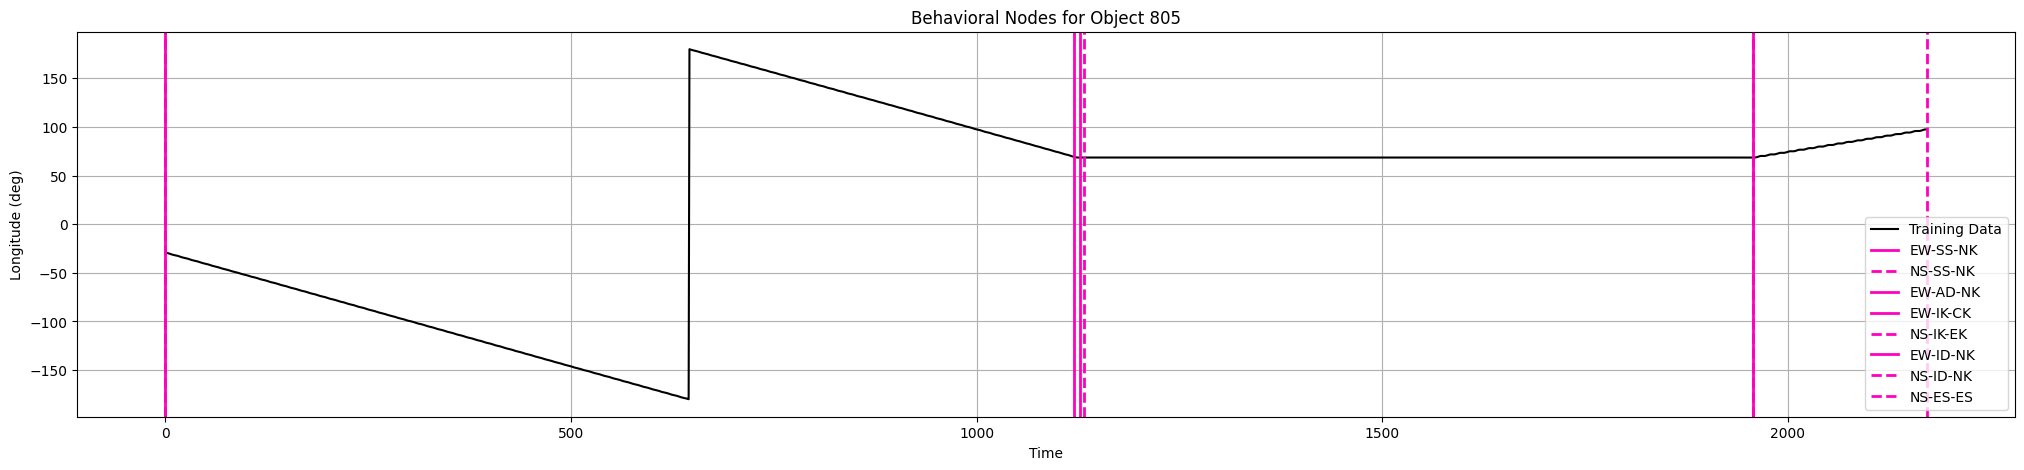

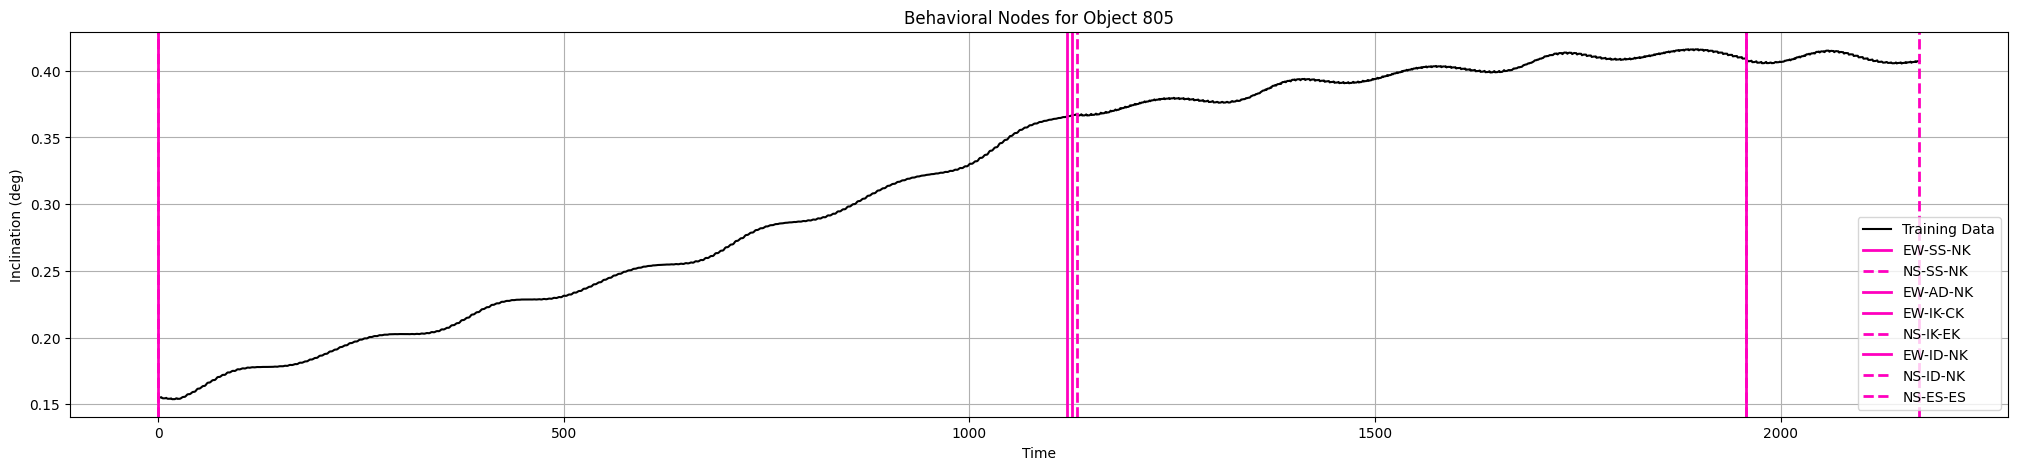

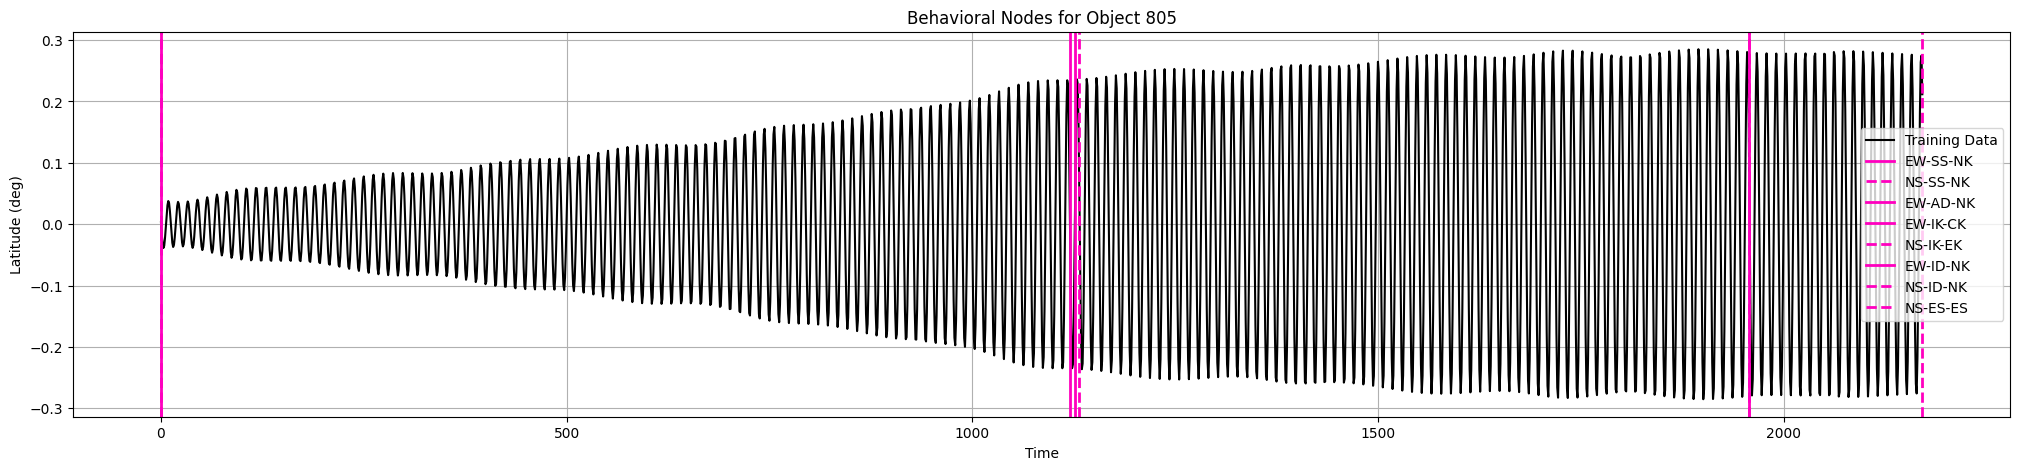

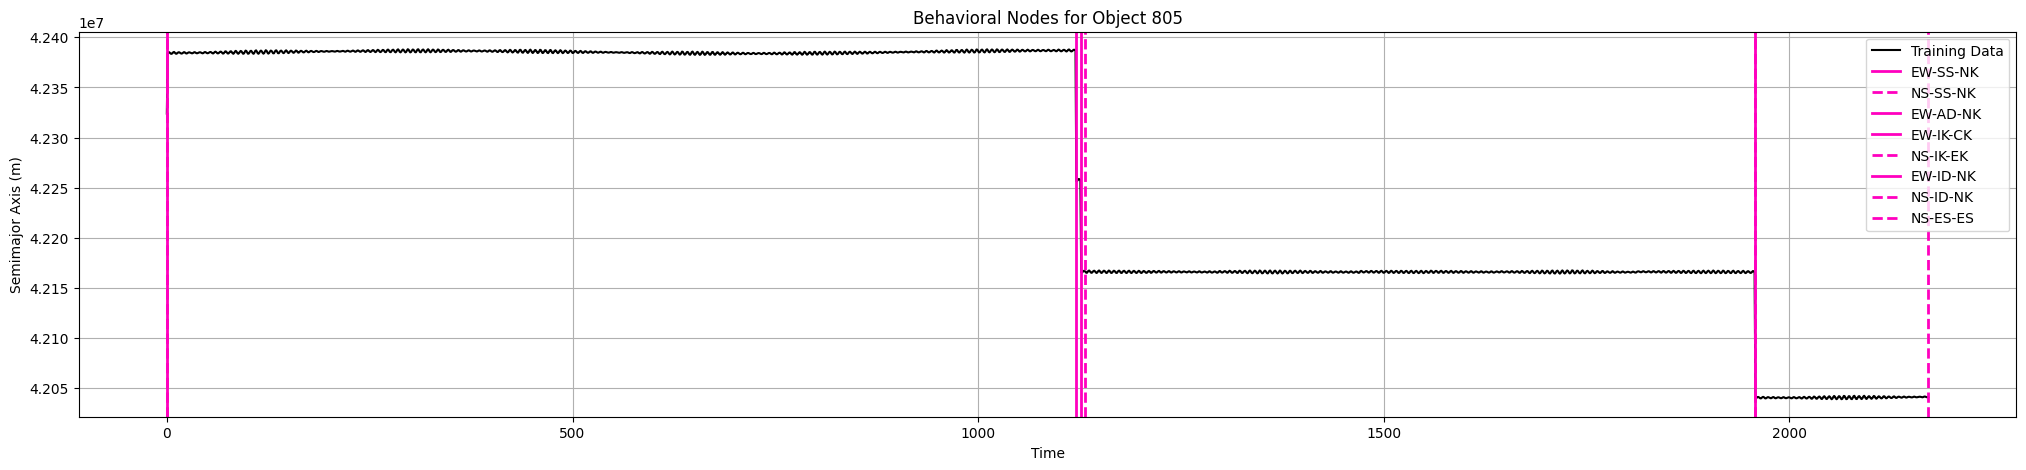

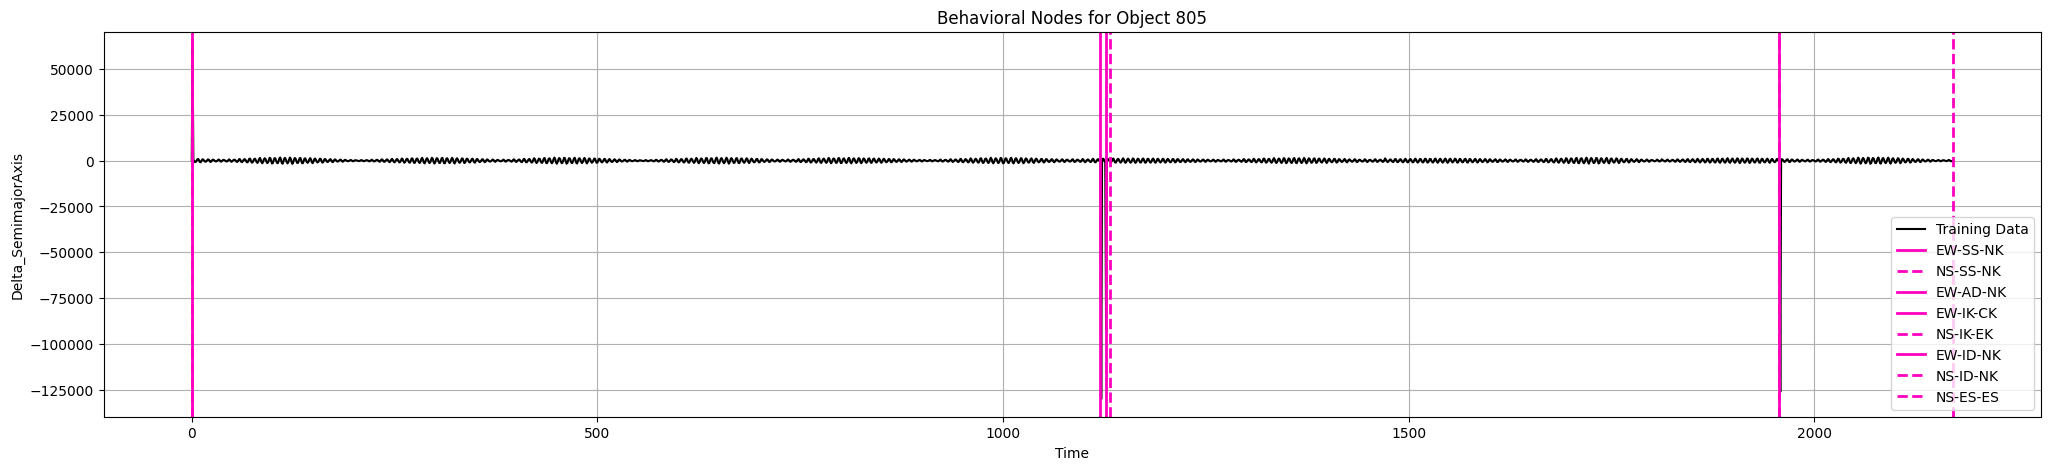

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


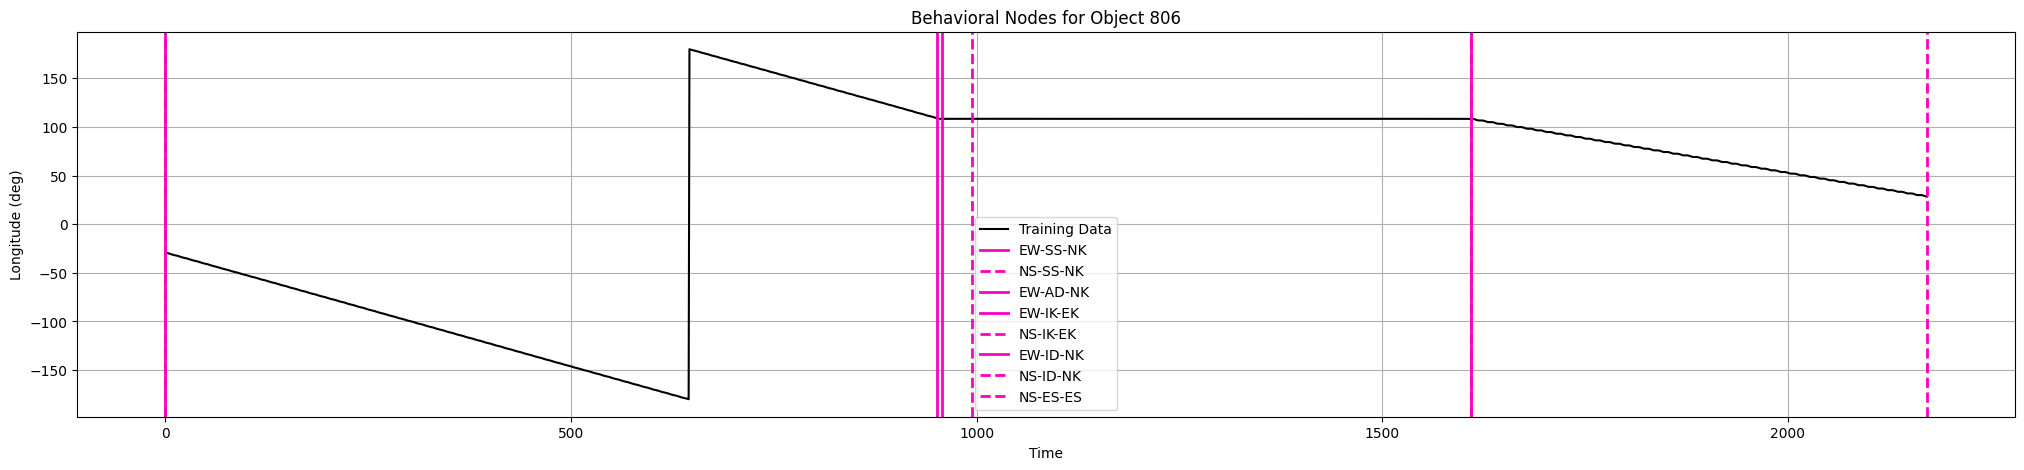

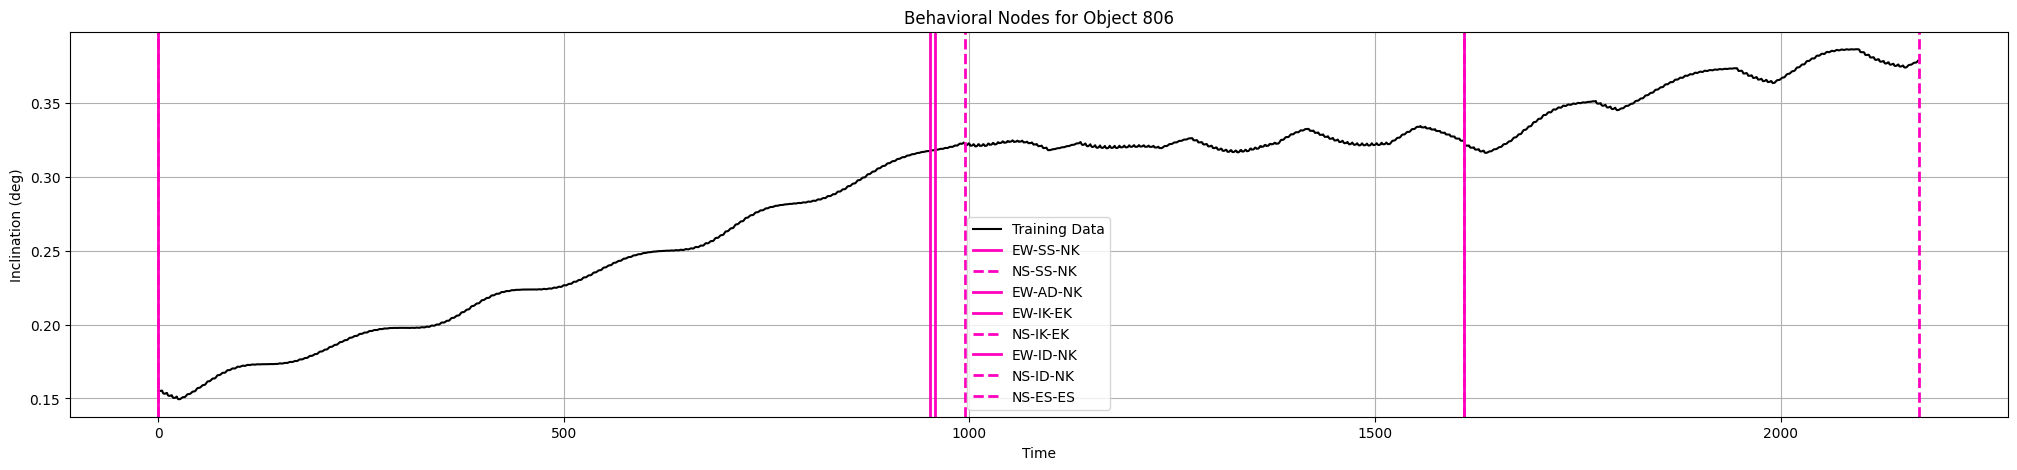

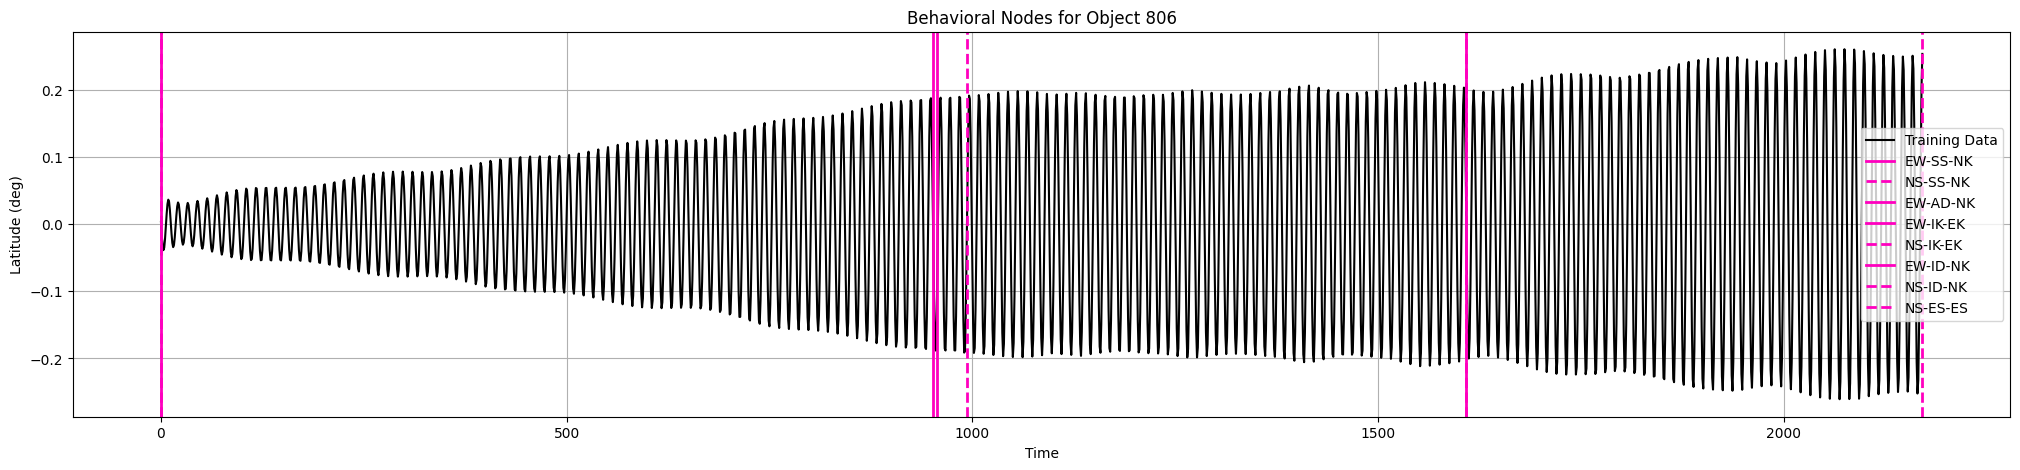

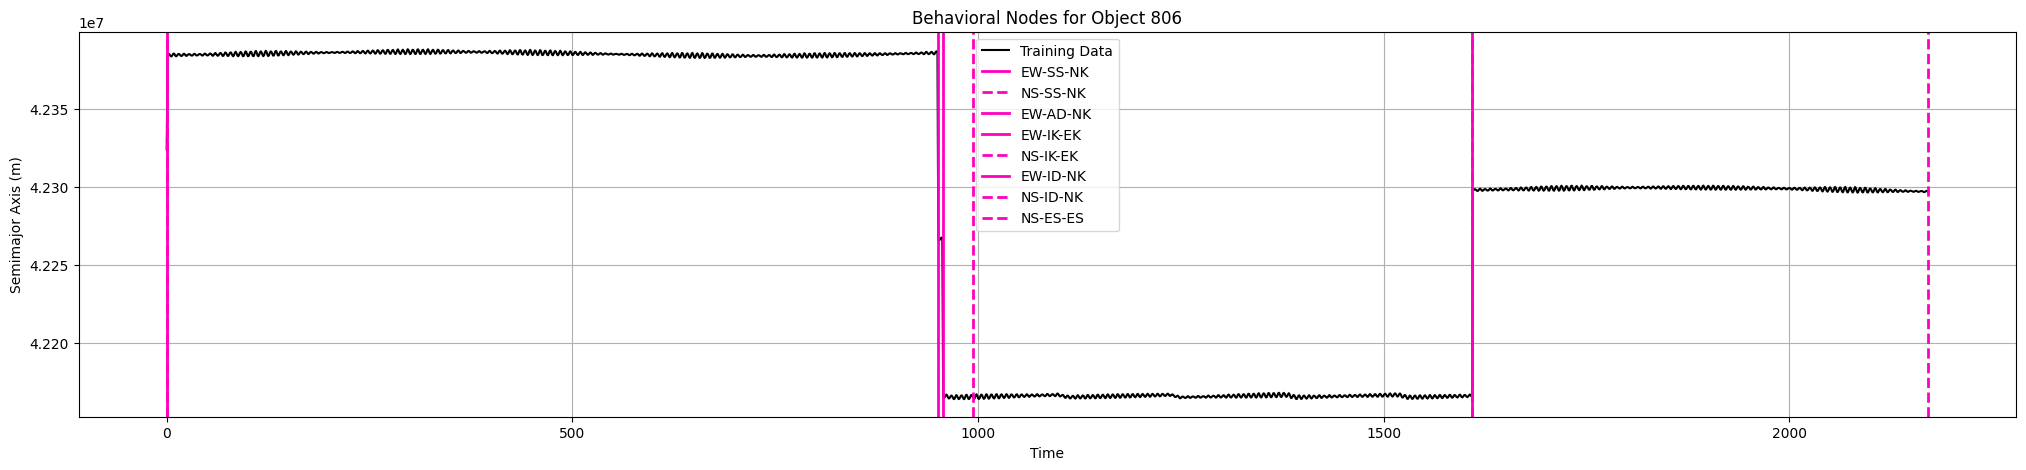

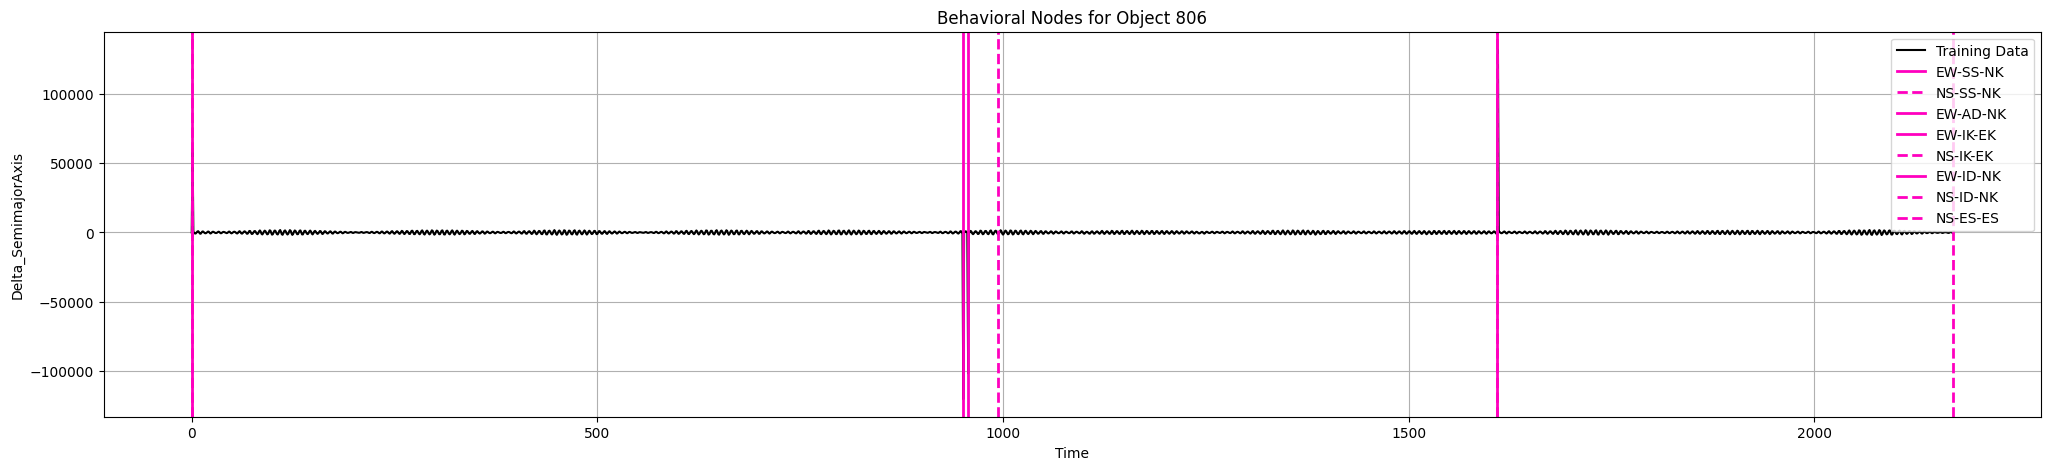

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


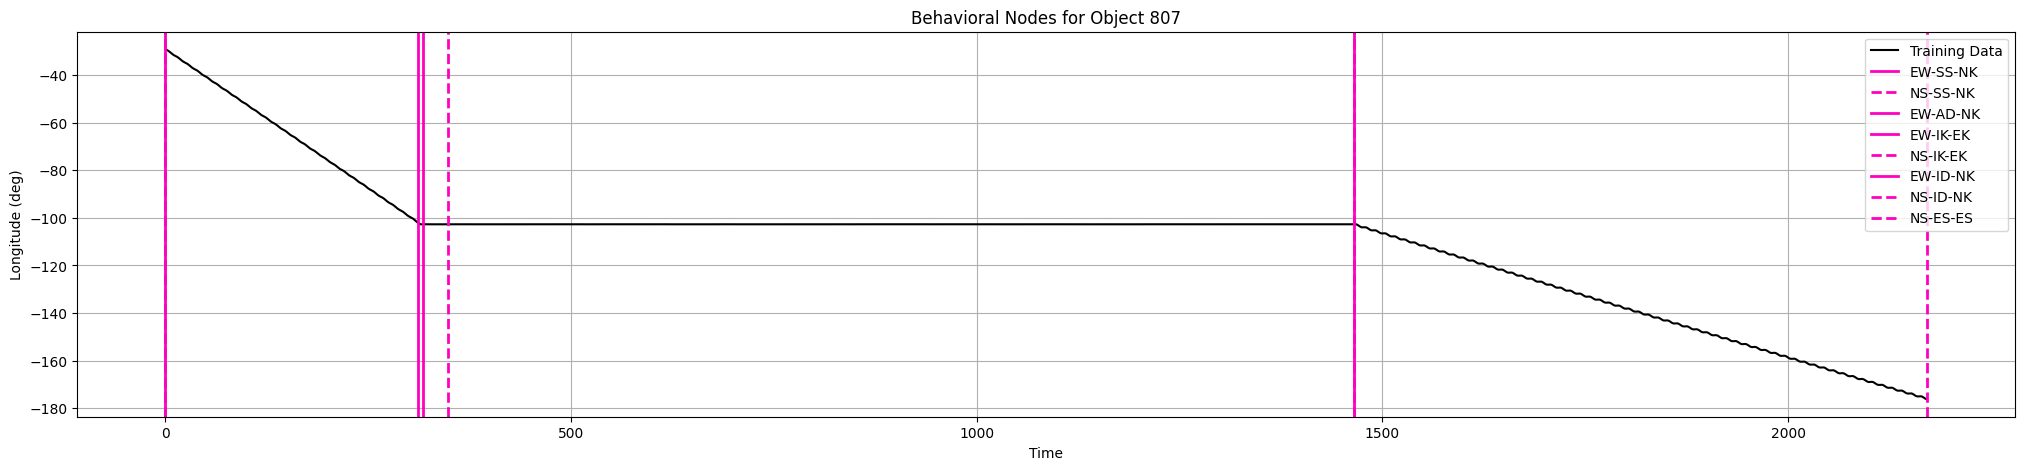

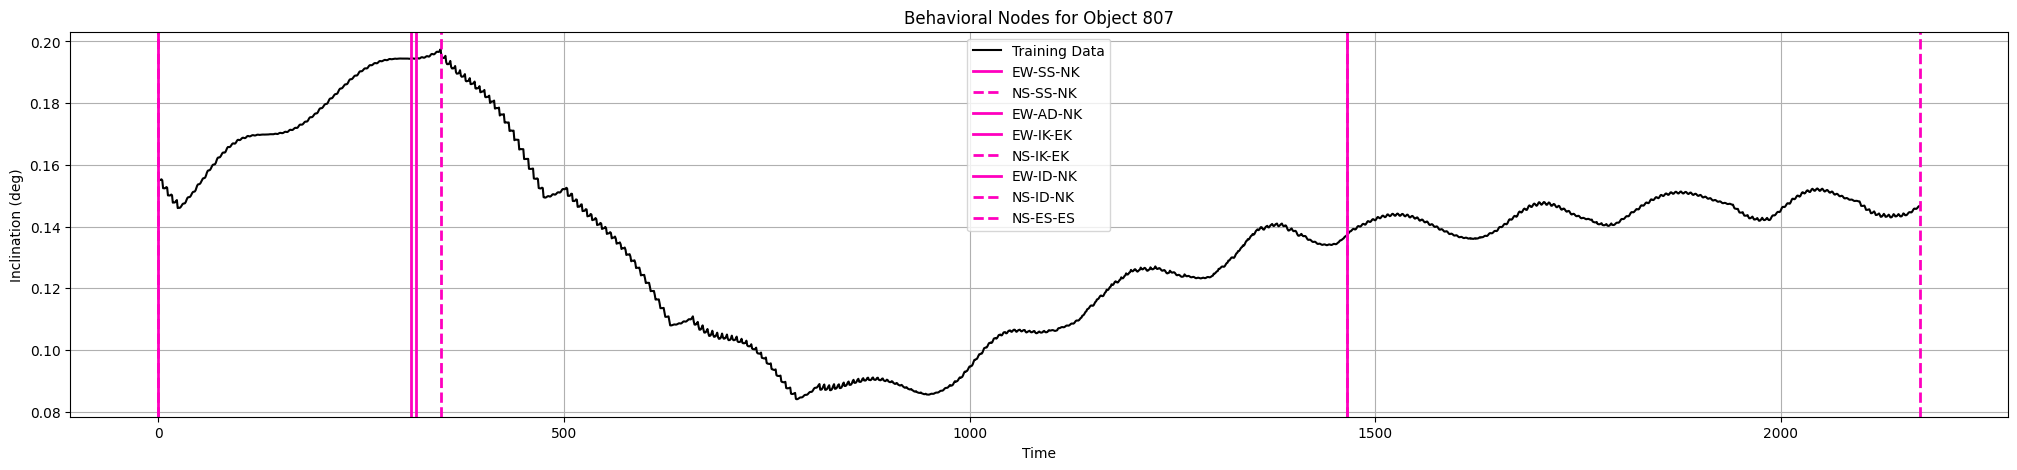

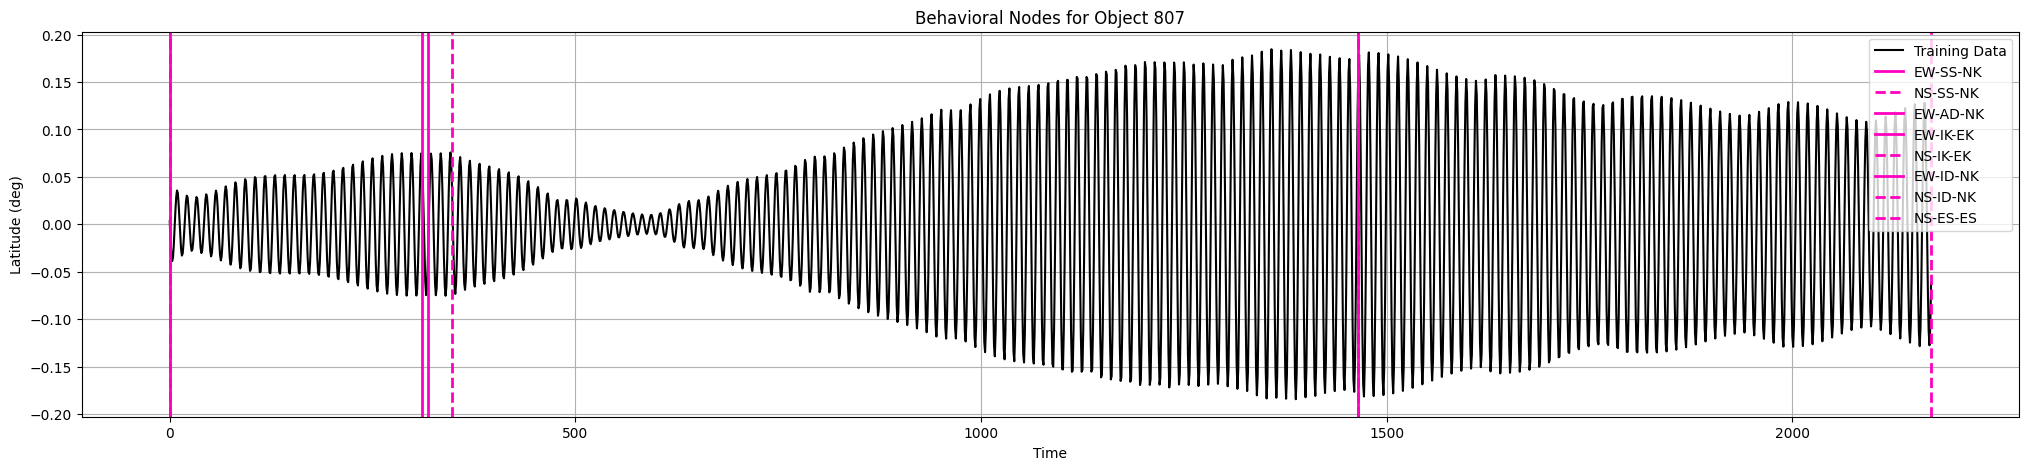

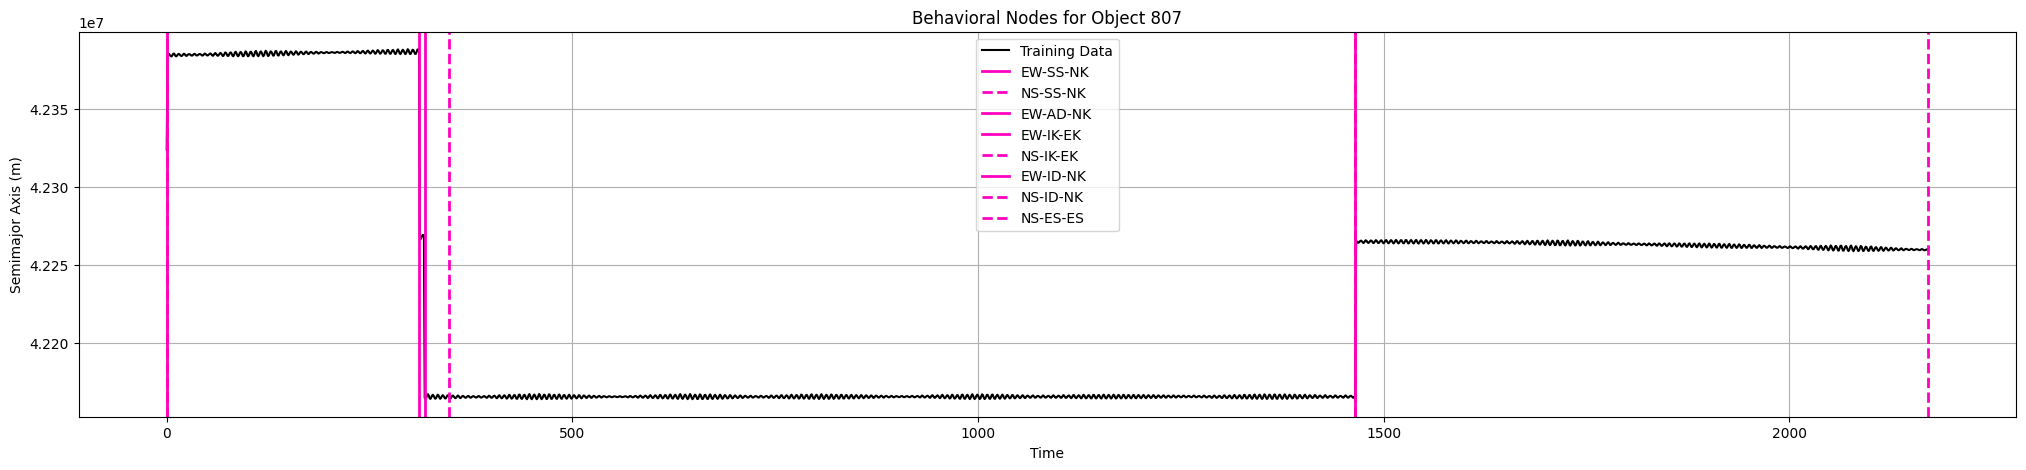

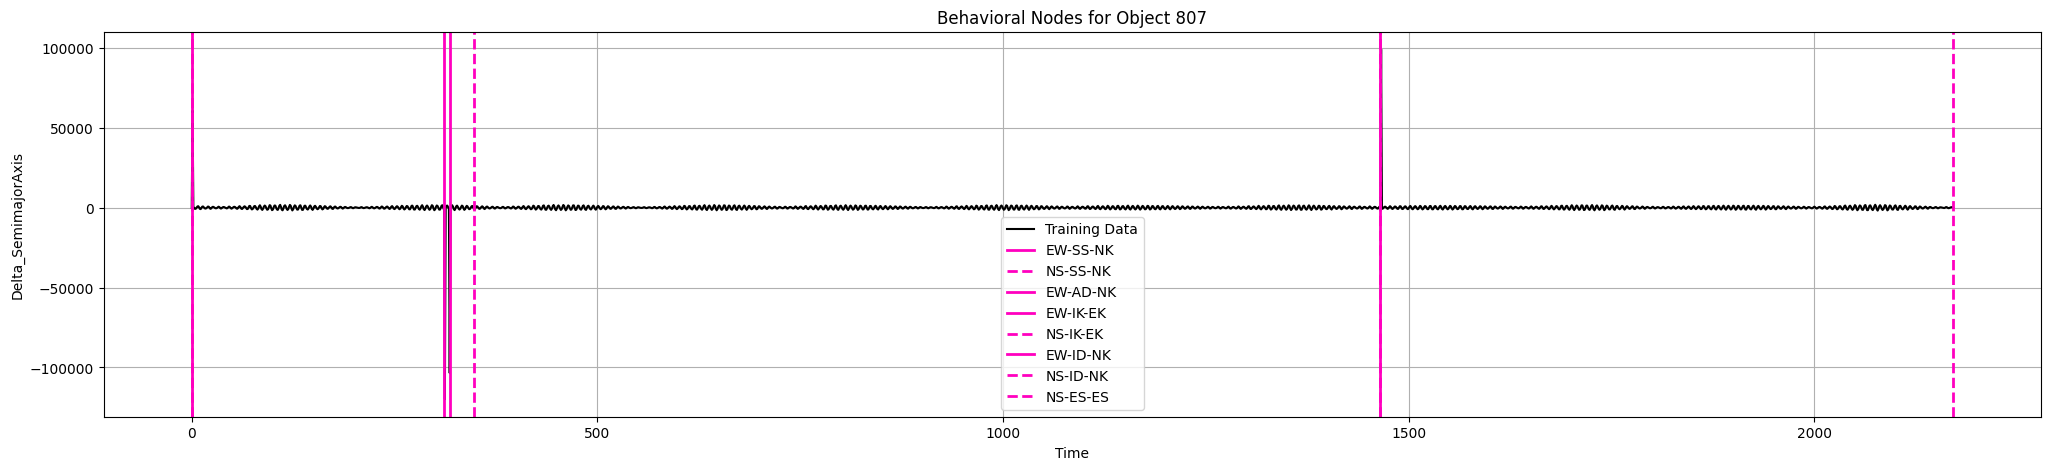

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


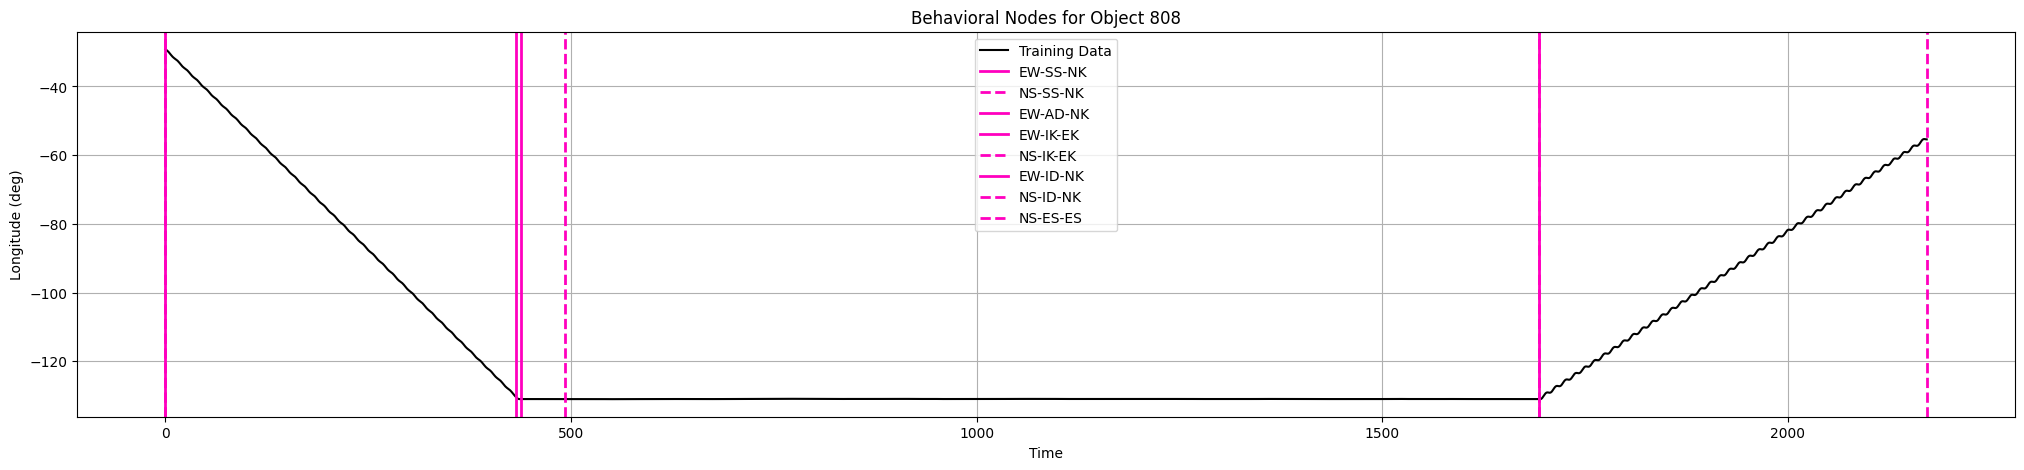

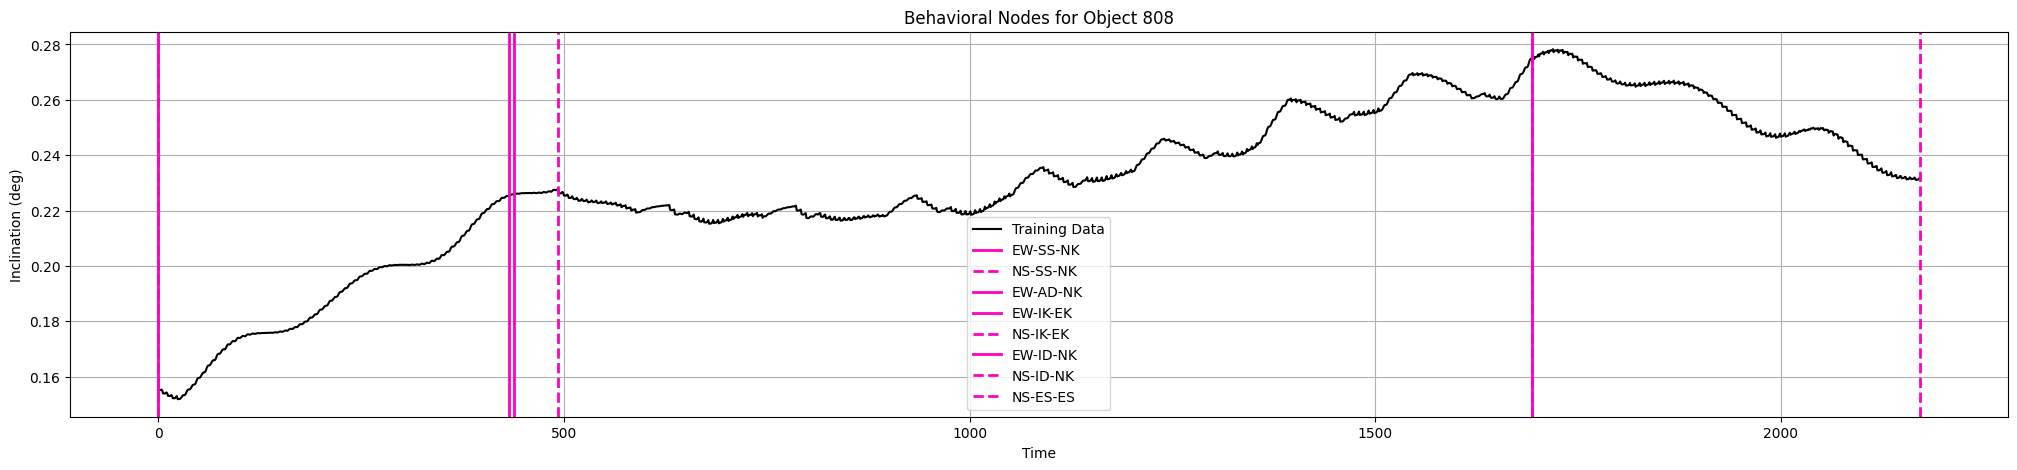

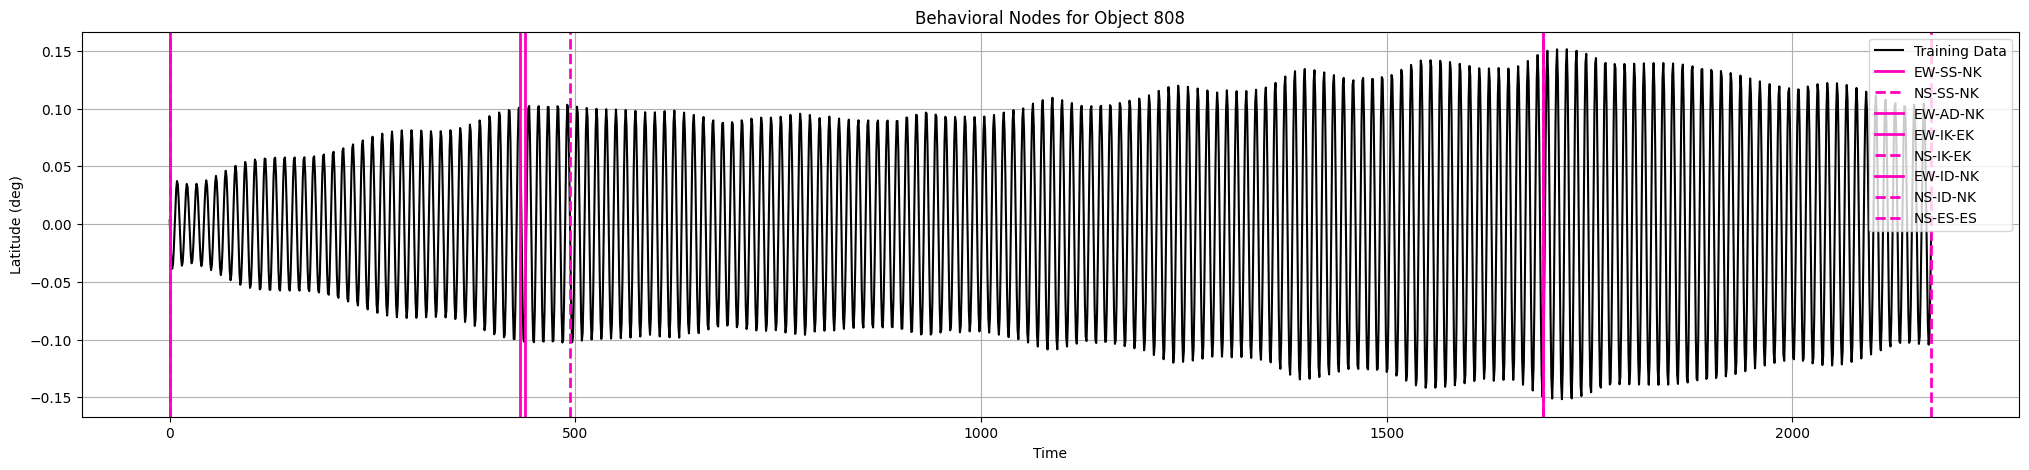

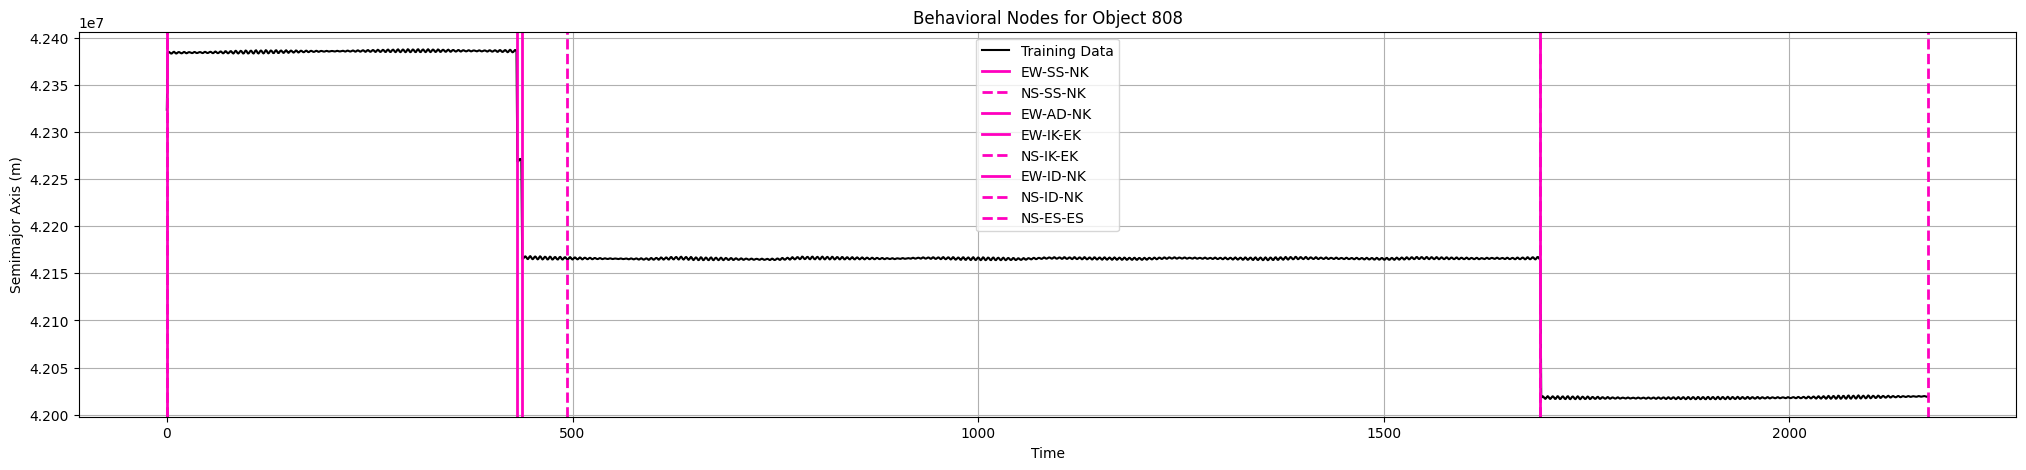

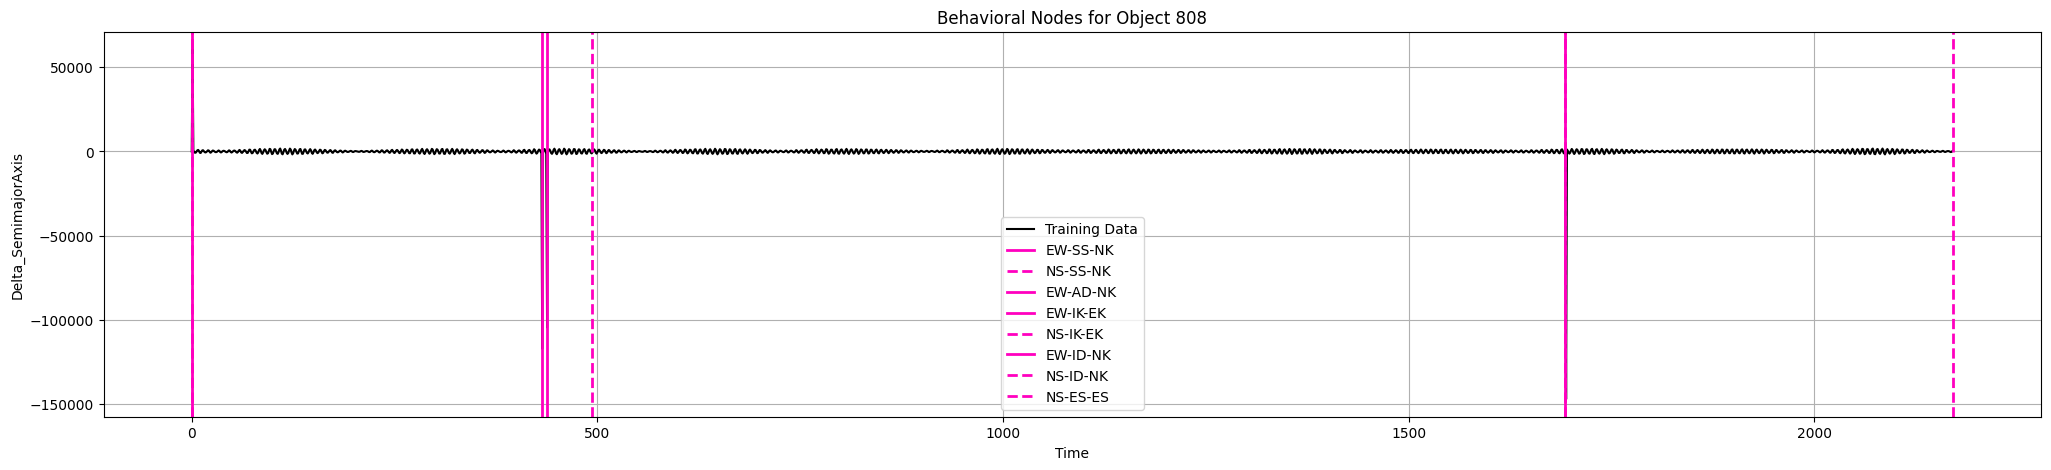

C:\Users\Joe\AppData\Local\Temp\ipykernel_12656\3659249325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[delta_column].fillna(0, inplace=True)


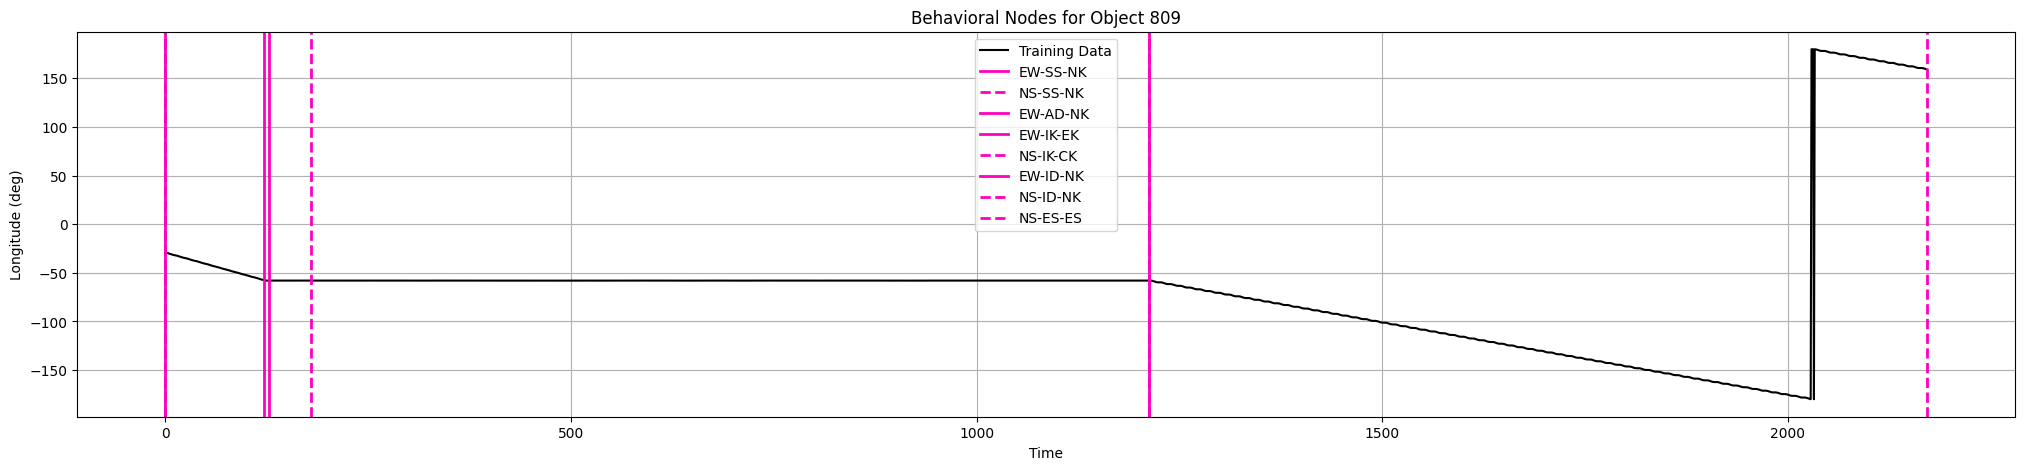

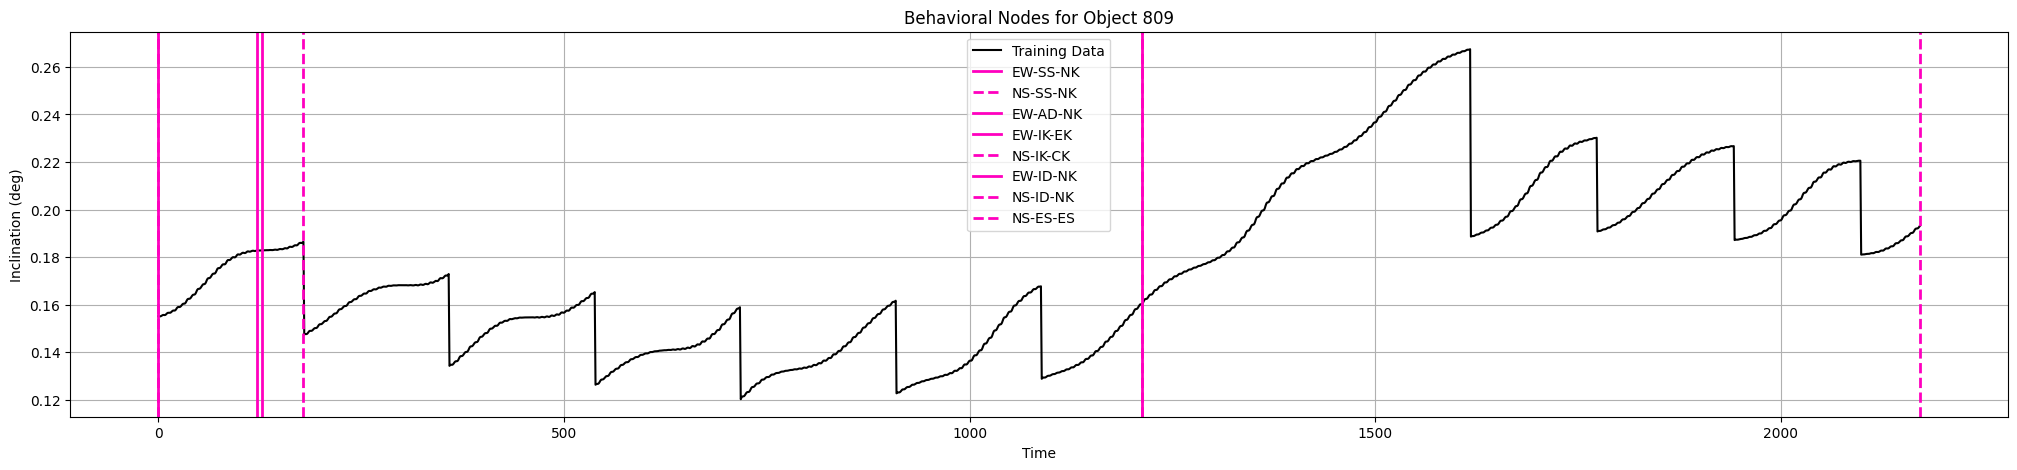

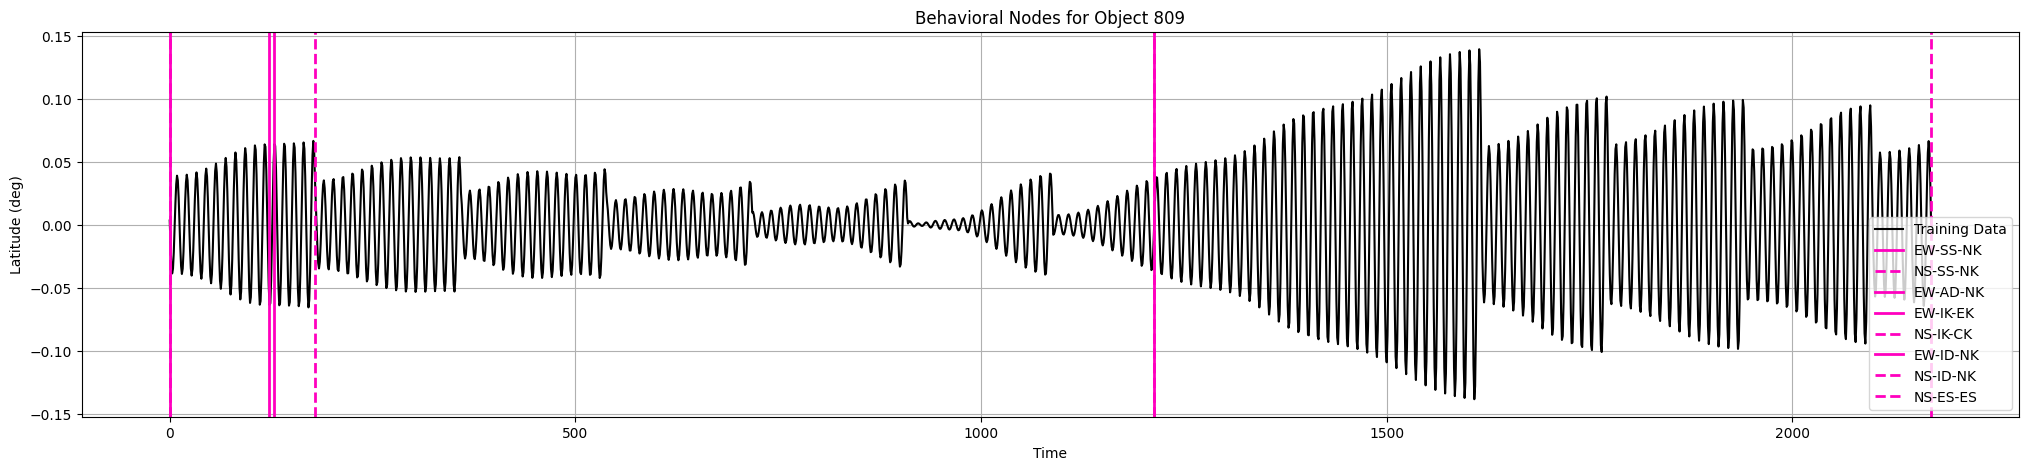

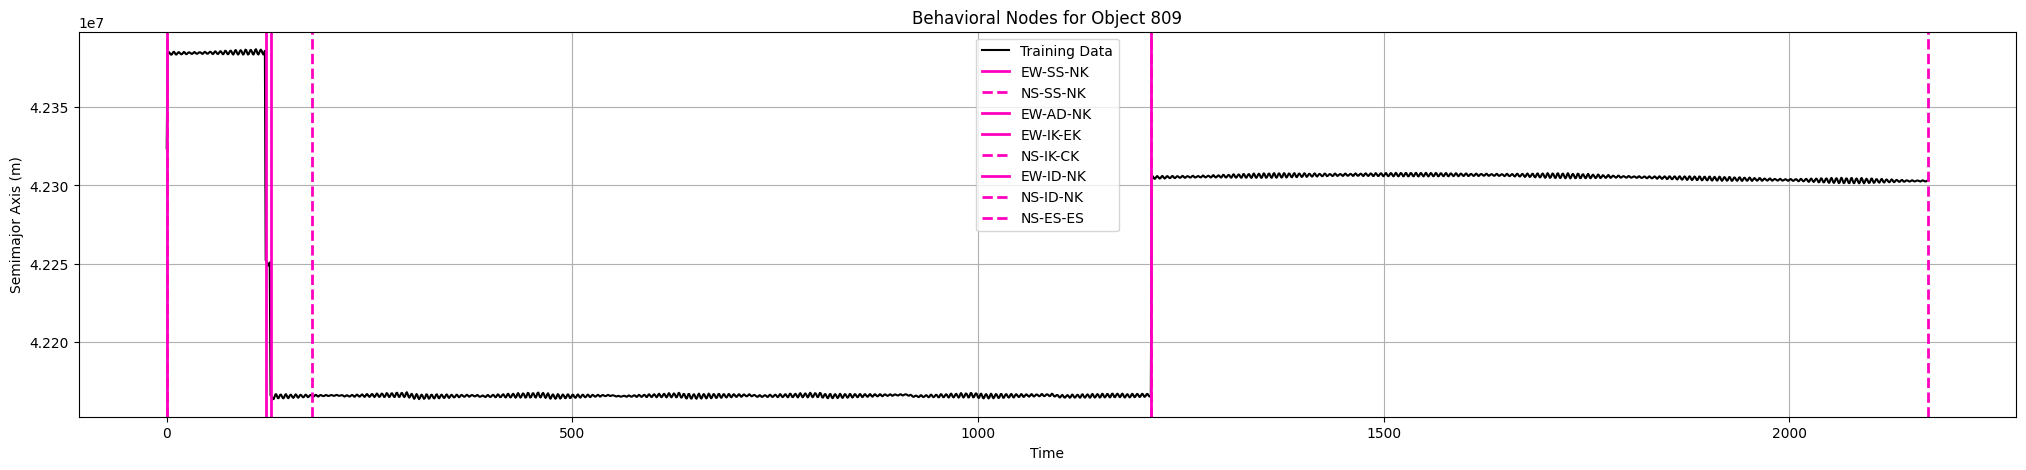

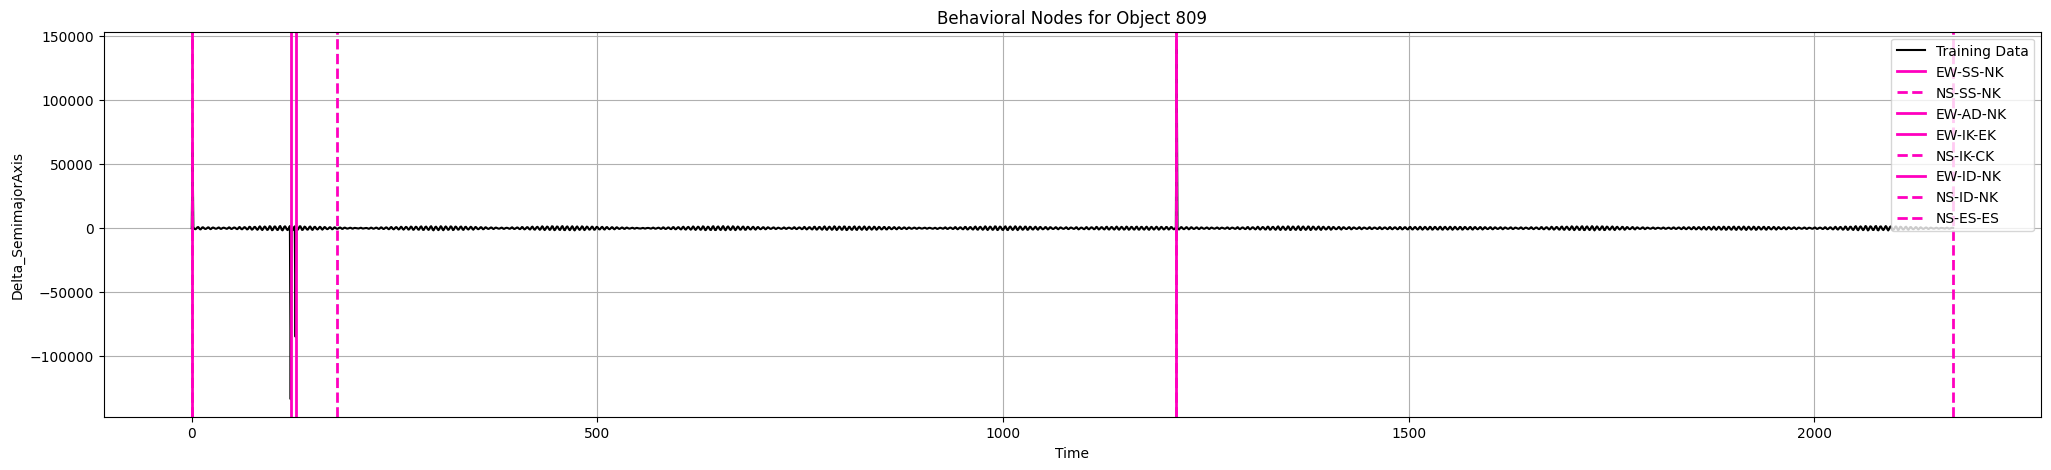

In [11]:
labelfile = "../dataset/phase_1_v3/train_labels.csv"

label_df = pd.read_csv(labelfile)


for object_id in range(804,810):
    datafile = "../dataset/phase_1_v3/train/"+str(object_id)+".csv"

    train_df = pd.read_csv(datafile)
    train_df["Object_id"]= object_id

    delta_column = "Delta_SemimajorAxis"
    train_df[delta_column] = train_df["Semimajor Axis (m)"].diff()
    train_df[delta_column].fillna(0, inplace=True)

    label_subset = label_df[label_df["ObjectID"]==object_id].copy().reindex()

    plot_field(object_id,train_df, label_subset, "Longitude (deg)")
    plot_field(object_id,train_df, label_subset, "Inclination (deg)")
    plot_field(object_id,train_df, label_subset, "Latitude (deg)")
    plot_field(object_id,train_df, label_subset, "Semimajor Axis (m)")
    plot_field(object_id,train_df, label_subset, "Delta_SemimajorAxis")